In [3]:
# Import required libraries

import numpy as np
import pandas as pd

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import pacf, grangercausalitytests, adfuller

from statsmodels.tsa import tsatools
# from dmba import regressionSummary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.options.display.max_columns = 20 
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning) # Suppress specific FutureWarnings

In [4]:
data = pd.read_csv('./final_sugar_price_forecasting_data.csv')
data

,Monthly Production (lakh tonnes),Sugar Export (metric tonnes),Sugar Import (metric tonnes),Date,Sugar Price,Price Change,CPI
0,40.94,NaN,NaN,2010-01-01,NaN,NaN,NaN
1,37.51,NaN,NaN,2010-02-01,NaN,NaN,NaN
2,29.49,NaN,NaN,2010-03-01,NaN,NaN,NaN
3,14.19,NaN,NaN,2010-04-01,NaN,NaN,NaN
4,4.23,NaN,NaN,2010-05-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...
174,NaN,NaN,NaN,2024-07-01,42.695473,-0.009028112081547133,5.22
175,NaN,NaN,NaN,2024-08-01,43.266667,0.013378313253011653,4.70
176,NaN,NaN,NaN,2024-09-01,42.675926,-0.013653483992466908,3.46
177,NaN,NaN,NaN,2024-10-01,42.884444,0.004886092427858497,NaN


In [5]:
# Filter the dataset to include only rows where all five variables are present
filtered_data = data.dropna(subset=[
    'Monthly Production (lakh tonnes)', 
    'Sugar Export (metric tonnes)', 
    'Sugar Import (metric tonnes)', 
    'Sugar Price',
    'CPI'
]).reset_index(drop=True).round(2)

filtered_data

,Monthly Production (lakh tonnes),Sugar Export (metric tonnes),Sugar Import (metric tonnes),Date,Sugar Price,Price Change,CPI
0,67.67,97131.0,321130.0,2018-01-01,39.20,-,2.77
1,60.54,114127.0,0.0,2018-02-01,39.10,-0.0025510204081633015,-0.17
2,51.64,134766.0,59110.0,2018-03-01,38.94,-0.003978402955385129,-1.61
3,28.48,159955.0,0.0,2018-04-01,37.70,-0.031859248692344265,-4.05
4,9.18,218721.0,135470.0,2018-05-01,35.36,-0.06220292794220167,-8.21
...,...,...,...,...,...,...,...
67,1.53,300613.0,152146.0,2023-08-01,42.75,0.013650264108979727,3.80
68,1.55,322979.0,252484.0,2023-09-01,43.65,0.0210192977533423,4.61
69,4.36,462256.0,76719.0,2023-10-01,43.85,0.004673152104736839,5.50
70,43.82,669226.0,133.0,2023-11-01,44.46,0.013846083572066521,6.55


## Univariate Analysis

Analyzing time series for: Monthly Production (lakh tonnes)
count    72.000000
mean     26.780694
std      27.334121
min       0.200000
25%       1.407500
50%      14.890000
75%      54.545000
max      73.910000
Name: Monthly Production (lakh tonnes), dtype: float64
Mean: 26.78
Variance: 747.15
Skewness: 0.48
Kurtosis: -1.44




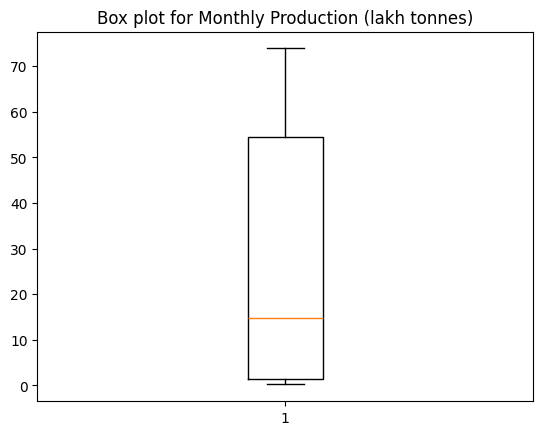

Analyzing time series for: Sugar Export (metric tonnes)
count    7.200000e+01
mean     6.417653e+05
std      4.324783e+05
min      9.713100e+04
25%      3.106442e+05
50%      5.876710e+05
75%      8.036020e+05
max      1.817902e+06
Name: Sugar Export (metric tonnes), dtype: float64
Mean: 641765.31
Variance: 187037462663.23
Skewness: 0.97
Kurtosis: 0.24




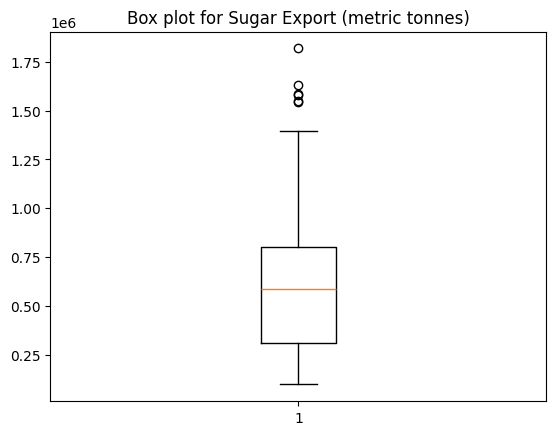

Analyzing time series for: Sugar Import (metric tonnes)
count        72.000000
mean     106330.583333
std      110366.862494
min           0.000000
25%           0.000000
50%       76688.500000
75%      179482.750000
max      478536.000000
Name: Sugar Import (metric tonnes), dtype: float64
Mean: 106330.58
Variance: 12180844336.84
Skewness: 1.03
Kurtosis: 0.90




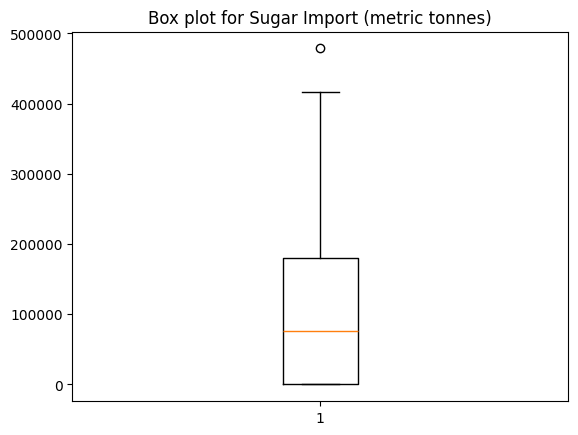

Analyzing time series for: Sugar Price
count    72.000000
mean     40.286250
std       1.542224
min      35.360000
25%      39.207500
50%      40.370000
75%      41.045000
max      44.460000
Name: Sugar Price, dtype: float64
Mean: 40.29
Variance: 2.38
Skewness: 0.23
Kurtosis: 1.68




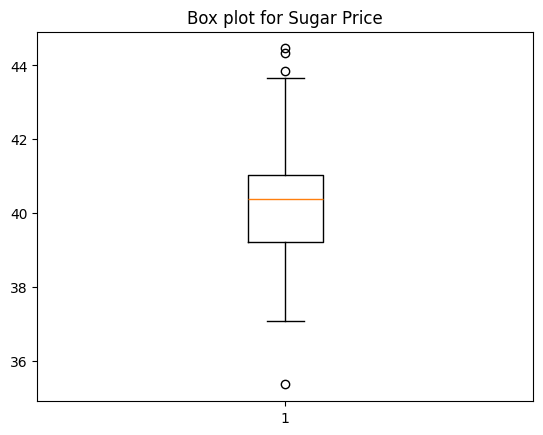

Analyzing time series for: CPI
count    72.000000
mean      0.751528
std       4.461895
min      -9.220000
25%      -0.890000
50%       1.295000
75%       4.182500
max      10.270000
Name: CPI, dtype: float64
Mean: 0.75
Variance: 19.91
Skewness: -0.62
Kurtosis: -0.29




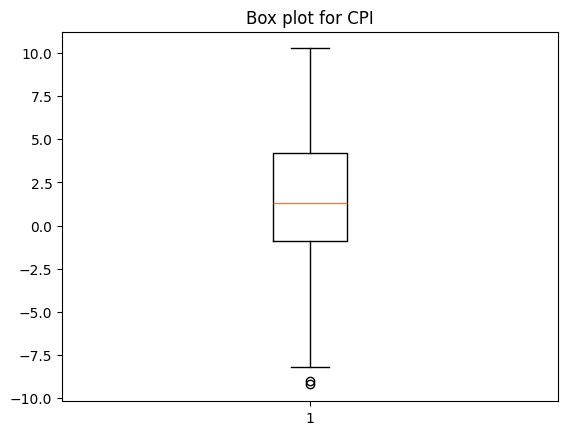

In [6]:
# Define a function to plot the box plots of all variables
def analyze_time_series(column_name):
    print(f"Analyzing time series for: {column_name}")
    
    # Drop NaN values for decomposition
    time_series = filtered_data[column_name].dropna()

    print(time_series.describe())

    print(f"Mean: {time_series.mean():.2f}")
    print(f"Variance: {time_series.var():.2f}")
    print(f"Skewness: {time_series.skew():.2f}")
    print(f"Kurtosis: {time_series.kurtosis():.2f}")

    print(f"\n")

    plt.boxplot(time_series)
    plt.title(f"Box plot for {col}")
    plt.show()
    
for col in filtered_data.columns:
    if col != 'Date' and col != 'Price Change':
        analyze_time_series(col)
    else:
        continue

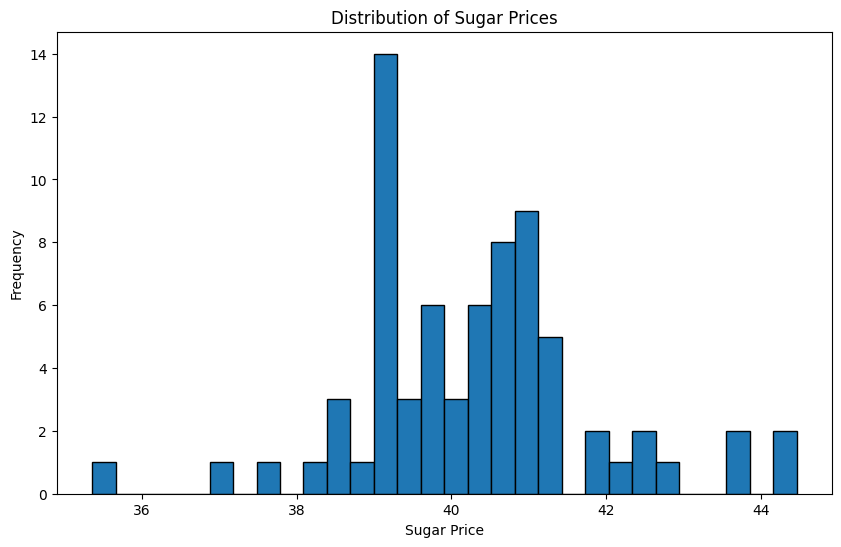

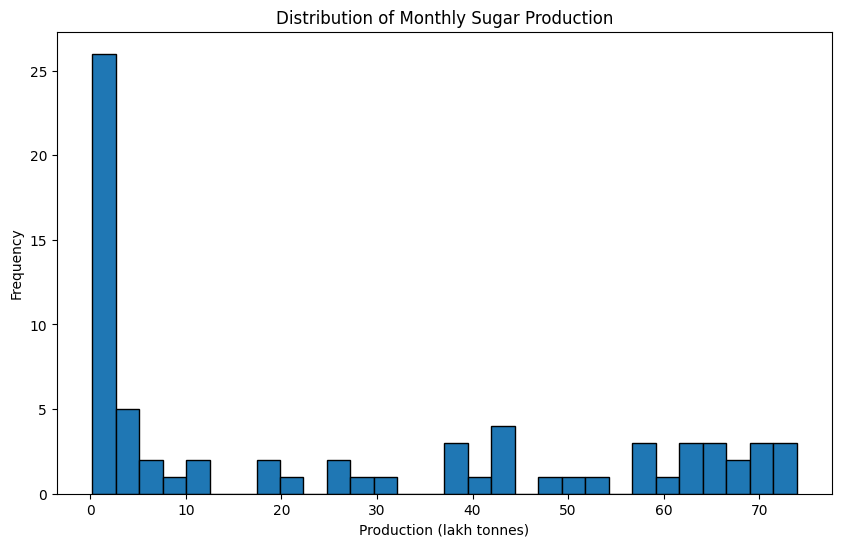

In [7]:

# Histogram of Sugar Prices
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Sugar Price'].dropna(), bins=30, edgecolor='k')
plt.title("Distribution of Sugar Prices")
plt.xlabel("Sugar Price")
plt.ylabel("Frequency")
plt.show()

# Monthly Sugar Production
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Monthly Production (lakh tonnes)'].dropna(), bins=30, edgecolor='k')
plt.title("Distribution of Monthly Sugar Production")
plt.xlabel("Production (lakh tonnes)")
plt.ylabel("Frequency")
plt.show()

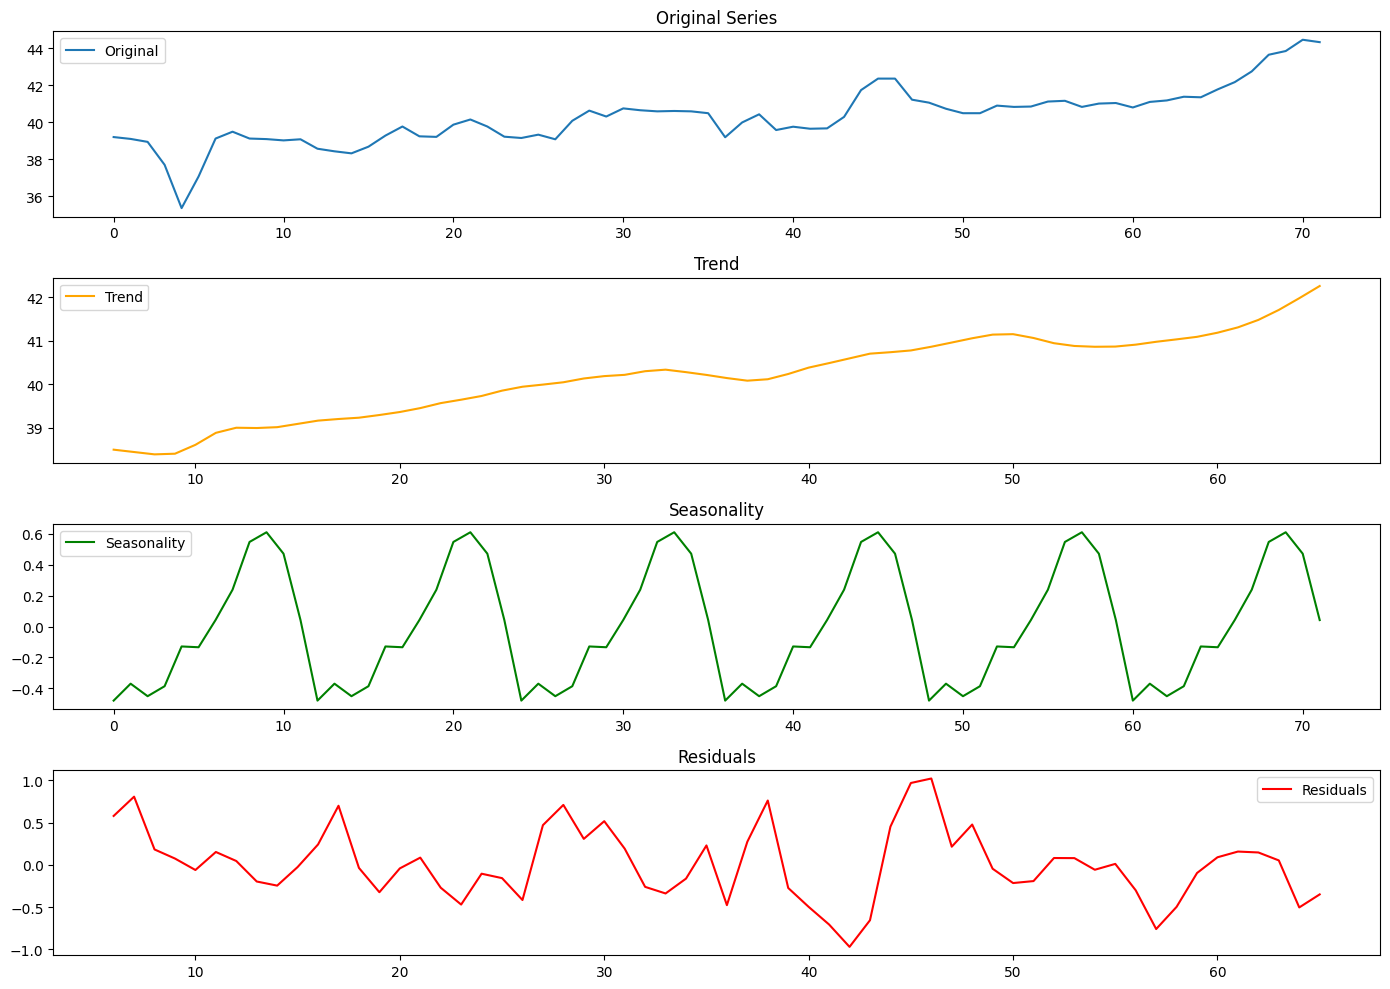

In [8]:
# Extract the 'Sugar Price' column as the time series
sugar_price_ts = filtered_data['Sugar Price'].dropna()  # Drop NaN values to avoid issues with decomposition

# Perform seasonal decomposition
decomposition = seasonal_decompose(sugar_price_ts, model='additive', period=12)

# Plot the original series, trend, seasonality, and residuals
plt.figure(figsize=(14, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(sugar_price_ts, label='Original')
plt.title('Original Series')
plt.legend()

# Trend
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Reset index for further analysis if needed
# filtered_data.reset_index(inplace=True, drop=True)


In [9]:
result = adfuller(filtered_data['Sugar Price'].dropna(), maxlag=12)  # Perform ADF Test
test_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result

print("Augmented Dickey-Fuller Test:")
print(f"Test Statistic: {test_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Number of Lags Used: {used_lag}")
print(f"Number of Observations: {n_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value:.4f}")

# Conclusion
if p_value < 0.05:
    print("\nThe series is stationary (Reject Null Hypothesis).")
else:
    print("\nThe series is NOT stationary (Fail to Reject Null Hypothesis).")

Augmented Dickey-Fuller Test:
Test Statistic: -0.8174
P-Value: 0.8140
Number of Lags Used: 0
Number of Observations: 71
Critical Values:
   1%: -3.5260
   5%: -2.9032
   10%: -2.5890

The series is NOT stationary (Fail to Reject Null Hypothesis).


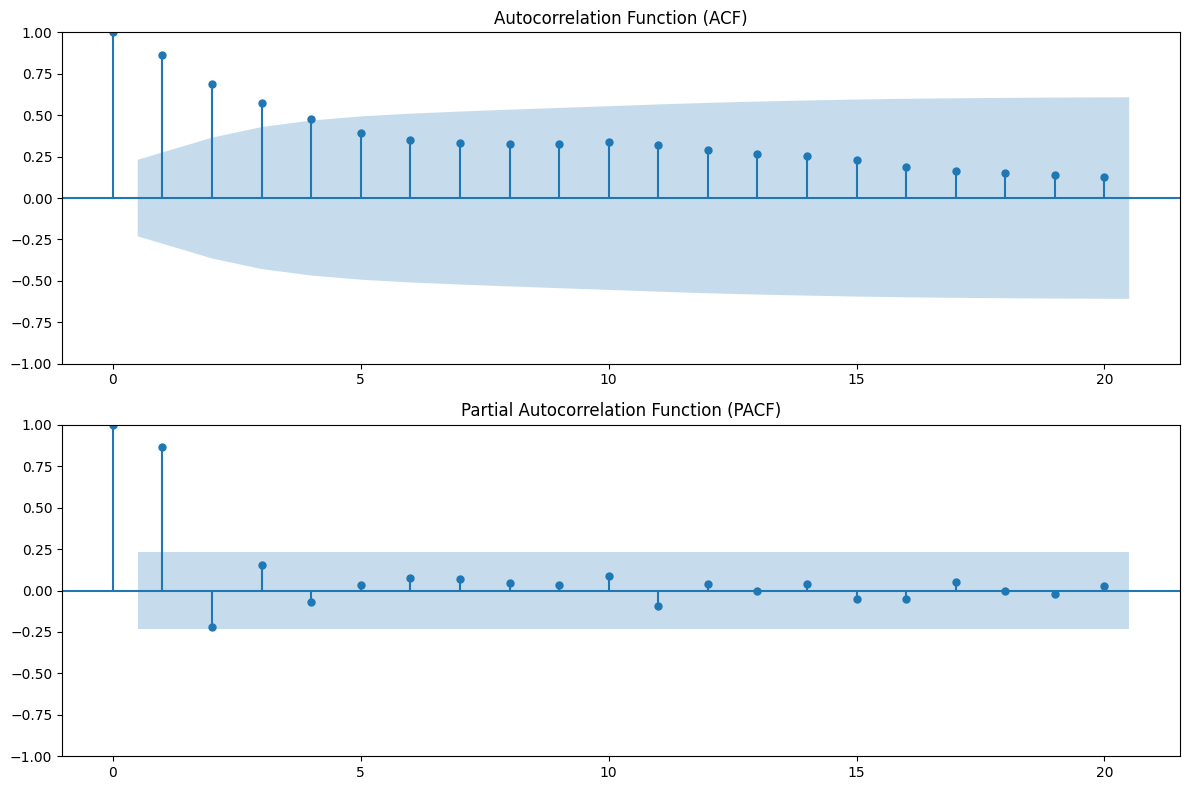

In [10]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(decomposition.observed.dropna(), lags=20, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(decomposition.observed.dropna(), lags=20, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

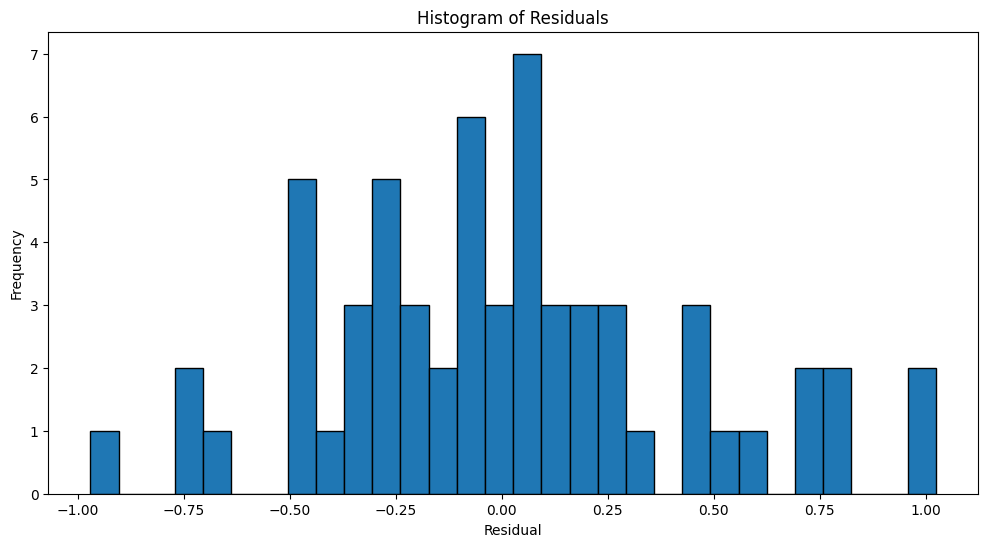

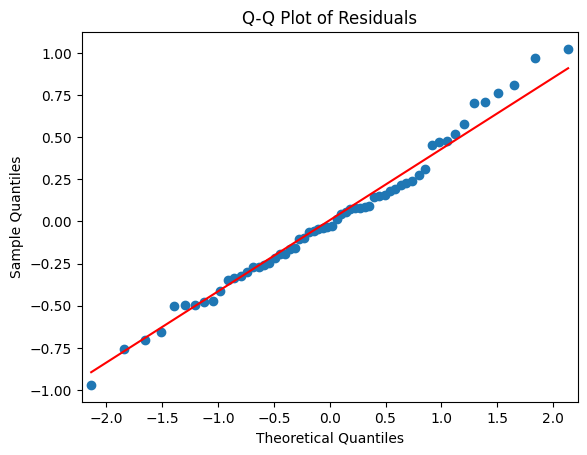

In [11]:
# Calculate residuals from the decomposition
residuals = decomposition.resid.dropna()

# Plot a histogram of the residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()



Residual Analysis:
- Histogram looks more and less normally distributed with long tails
- QQ plot shows a heavy positive tail

Analyzing time series for: Monthly Production (lakh tonnes)


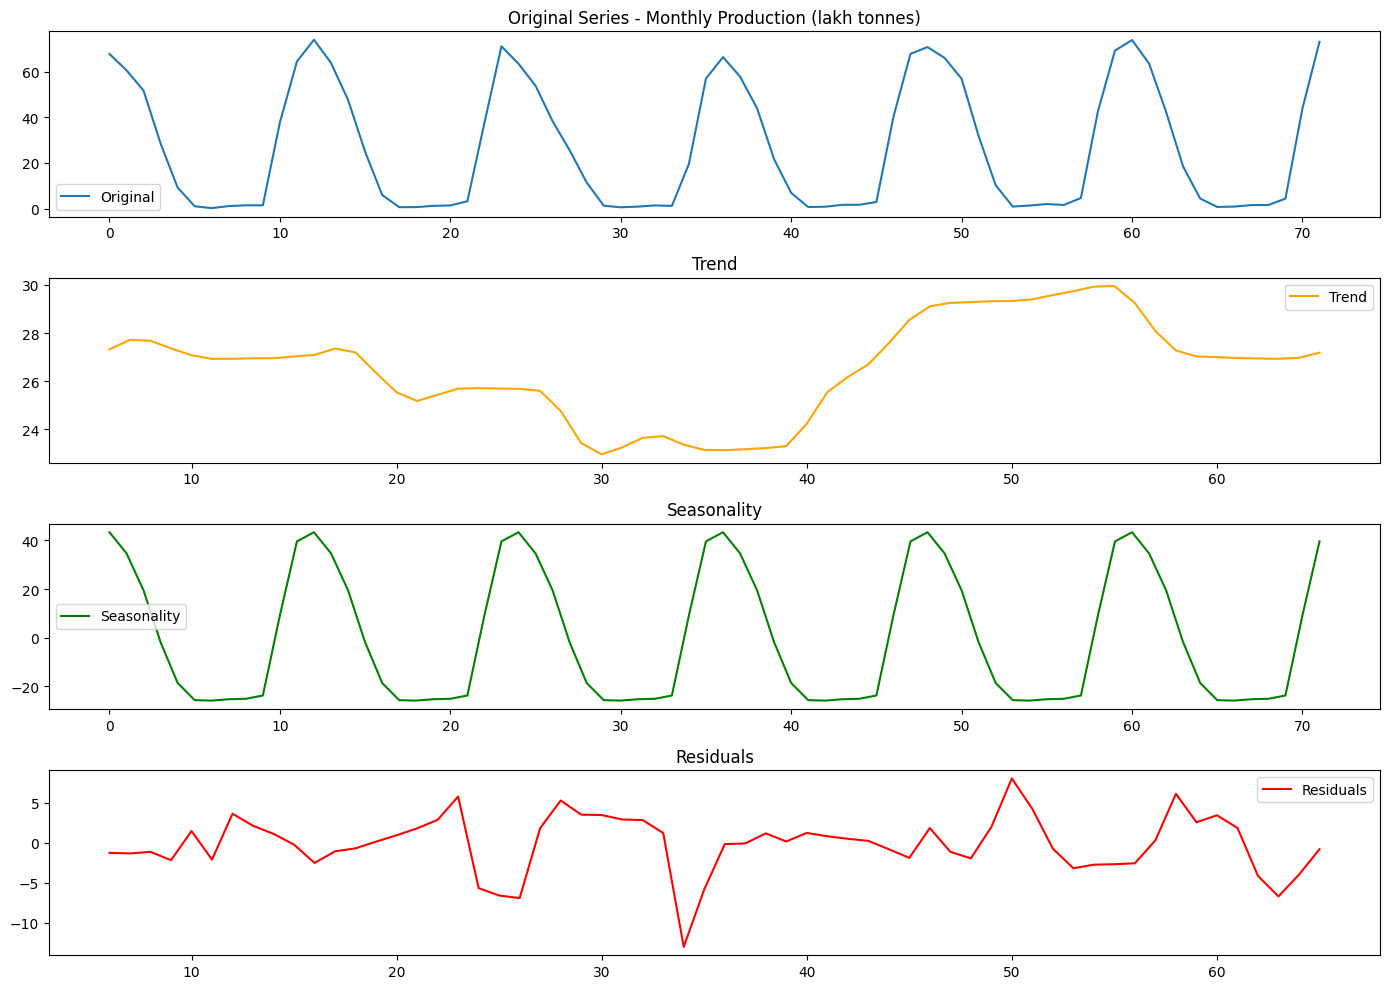

Analyzing time series for: Sugar Export (metric tonnes)


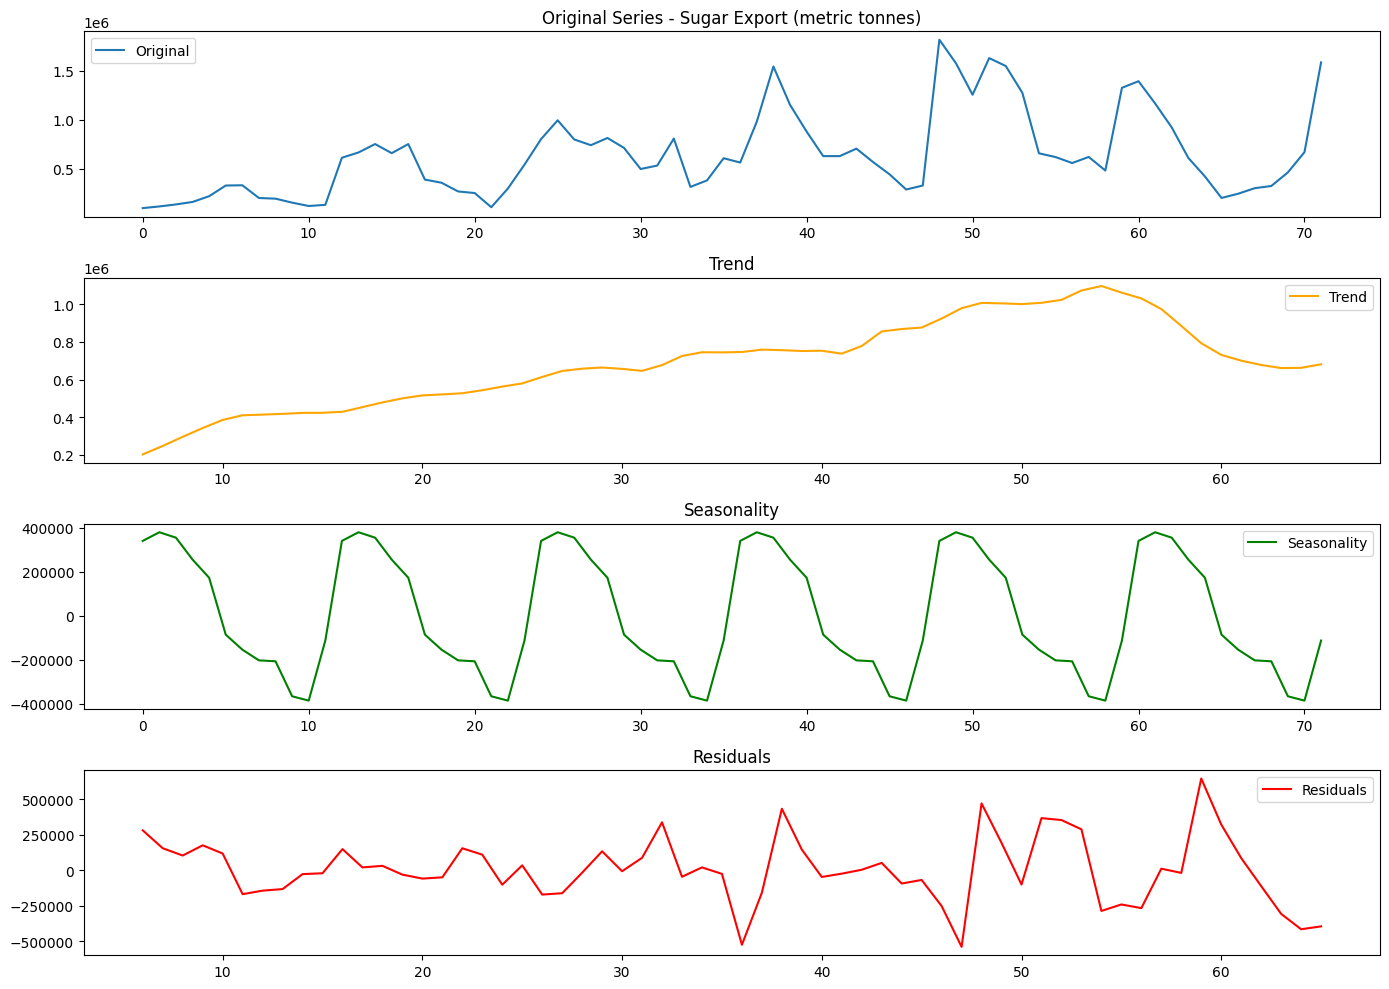

Analyzing time series for: Sugar Import (metric tonnes)


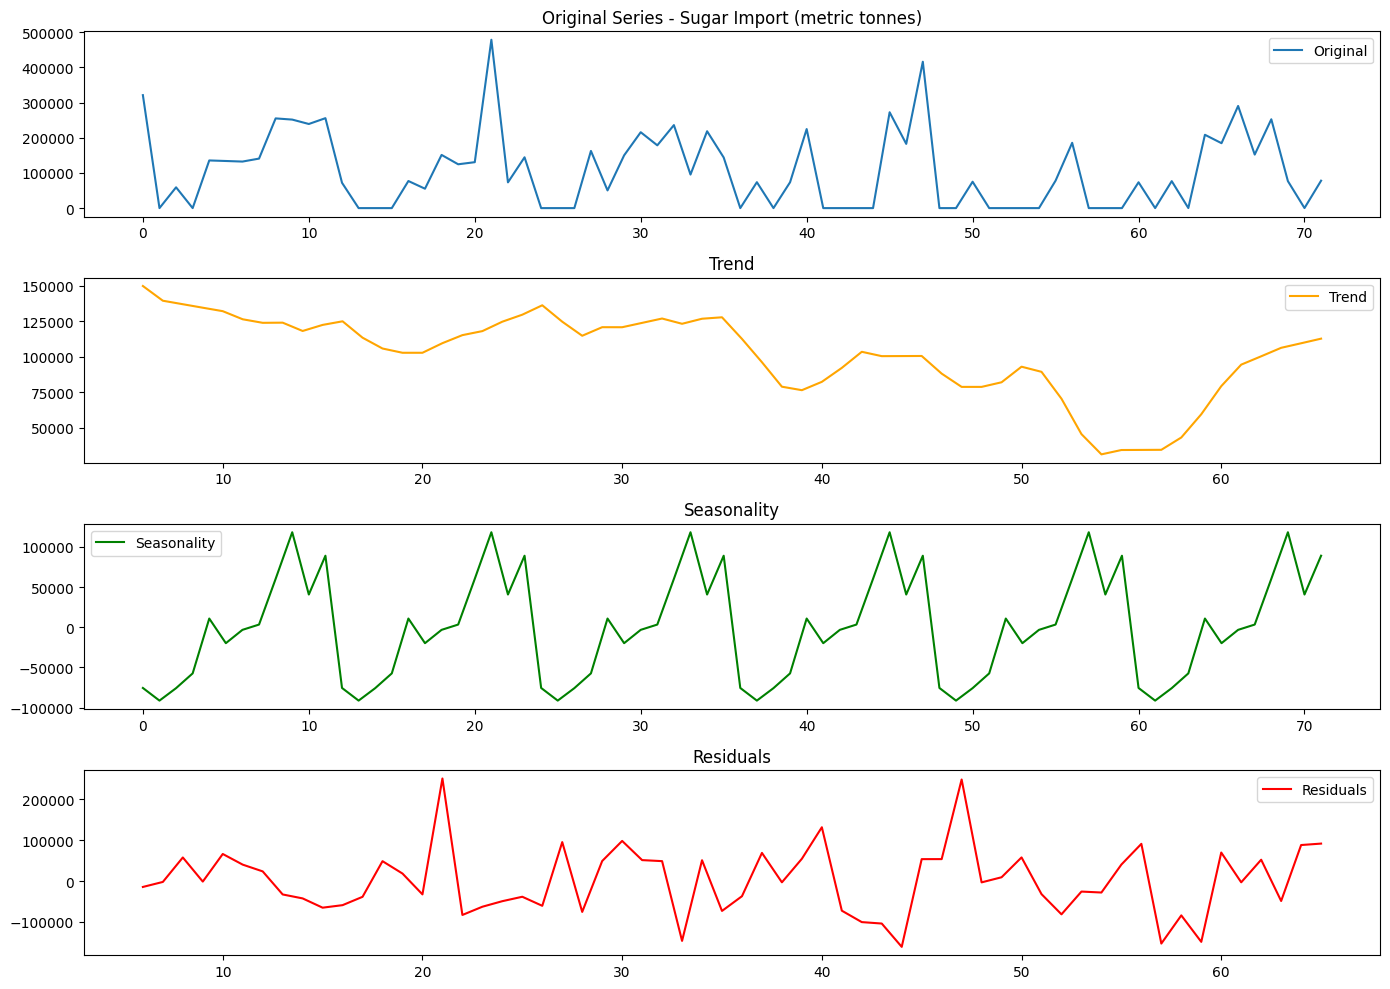

In [12]:
# Define a function to analyze trend, seasonality, and residuals for a given column
def analyze_time_series(column_name, period):
    print(f"Analyzing time series for: {column_name}")
    
    # Drop NaN values for decomposition
    time_series = filtered_data[column_name].dropna()

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(time_series, model='additive', period=period)

    # Plot the decomposition components
    plt.figure(figsize=(14, 10))

    # Original Series
    plt.subplot(4, 1, 1)
    plt.plot(time_series, label='Original')
    plt.title(f'Original Series - {column_name}')
    plt.legend()

    # Trend
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')
    plt.legend()

    # Seasonality
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title('Seasonality')
    plt.legend()

    # Residuals
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Perform analysis for each of the specified columns
analyze_time_series('Monthly Production (lakh tonnes)', period=12)
analyze_time_series('Sugar Export (metric tonnes)', period=12)
analyze_time_series('Sugar Import (metric tonnes)', period=12)

# Reset index for further analysis
# filtered_data.reset_index(inplace=True, drop=True)

## Multi-variate Analysis

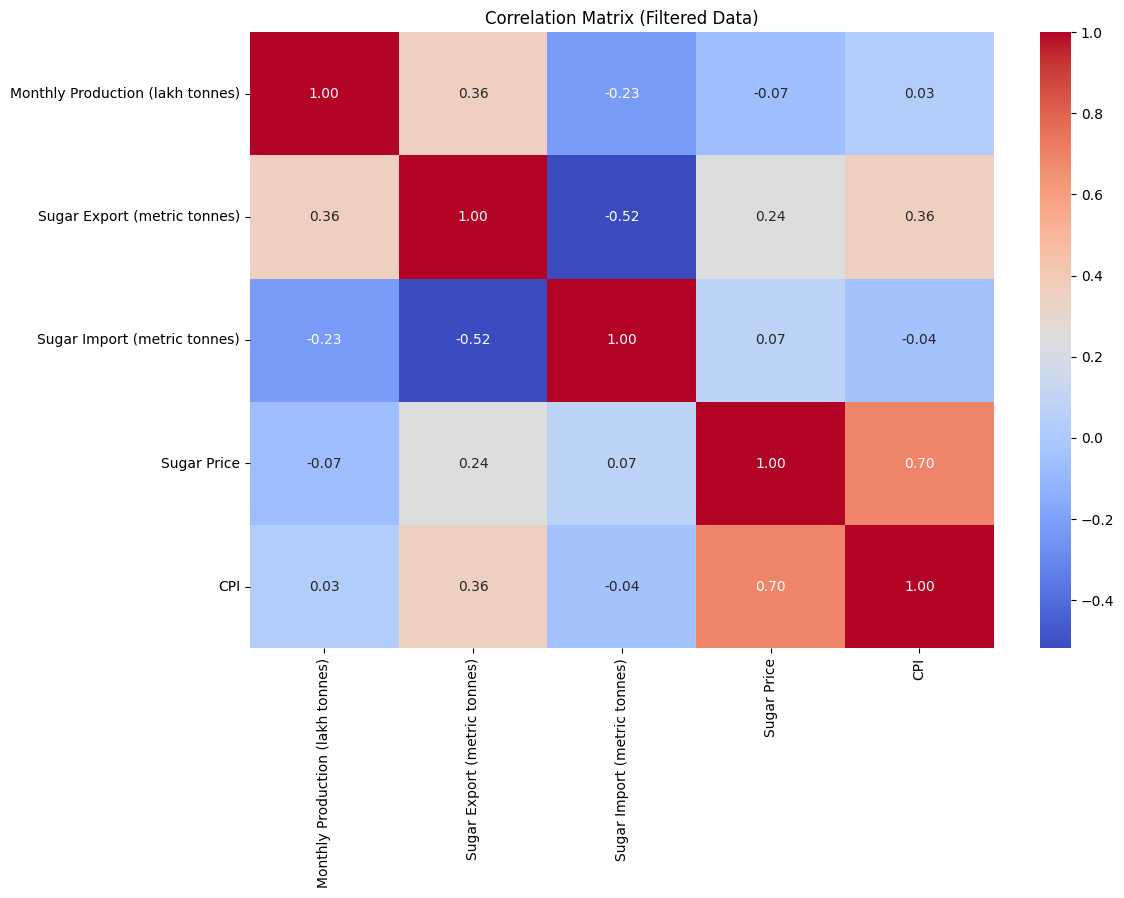

In [13]:
# Filter the dataset to include only rows where all five variables are present
filtered_data = filtered_data.dropna(subset=[
    'Monthly Production (lakh tonnes)', 
    'Sugar Export (metric tonnes)', 
    'Sugar Import (metric tonnes)', 
    'Sugar Price',
    'CPI'
])

# Calculate correlation matrix for the filtered dataset
correlation_matrix = filtered_data[['Monthly Production (lakh tonnes)', 
                                    'Sugar Export (metric tonnes)', 
                                    'Sugar Import (metric tonnes)', 
                                    'Sugar Price',
                                    'CPI']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix (Filtered Data)")
plt.show()

### General Insights from Corelation Matrix:
#### - Exports and Imports have a clear inverse relationship, as expected in trade dynamics.
#### - Production and Exports show a positive relationship, which aligns with the idea that surplus production supports higher exports.
#### - Sugar Prices appear to be relatively independent of production and imports, indicating other factors (e.g., demand, global market trends) might influence pricing.
#### - As expected, there is a very strong positive correlation between CPI (Consumer Price Index) and Sugar Prices 


In [14]:
# Granger Causality Test Function
def granger_causality_test(dataframe, x_col, y_col, max_lag=5):
    """
    Perform Granger Causality Test between two time series.

    Parameters:
        dataframe (pd.DataFrame): DataFrame containing time series data.
        x_col (str): Name of the time series column X (potential cause).
        y_col (str): Name of the time series column Y (effect).
        max_lag (int): Maximum number of lags to test.

    Returns:
        None: Prints Granger Causality Test results.
    """
    print(f"\n--- Granger Causality Test: {x_col} causes {y_col} ---")
    test_result = grangercausalitytests(dataframe[[y_col, x_col]], max_lag, verbose=True)
    return test_result

In [15]:
for col in [x for x in filtered_data.columns if x not in ['Sugar Price', 'Date', 'Price Change']]:
    # Run Granger Causality Test
    granger_causality_test(filtered_data, x_col=col, y_col='Sugar Price', max_lag=6)


--- Granger Causality Test: Monthly Production (lakh tonnes) causes Sugar Price ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.0170  , p=0.0100  , df_denom=68, df_num=1
ssr based chi2 test:   chi2=7.3265  , p=0.0068  , df=1
likelihood ratio test: chi2=6.9727  , p=0.0083  , df=1
parameter F test:         F=7.0170  , p=0.0100  , df_denom=68, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6661  , p=0.0771  , df_denom=65, df_num=2
ssr based chi2 test:   chi2=5.7423  , p=0.0566  , df=2
likelihood ratio test: chi2=5.5189  , p=0.0633  , df=2
parameter F test:         F=2.6661  , p=0.0771  , df_denom=65, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9287  , p=0.0124  , df_denom=62, df_num=3
ssr based chi2 test:   chi2=13.1168 , p=0.0044  , df=3
likelihood ratio test: chi2=12.0085 , p=0.0074  , df=3
parameter F test:         F=3.9287  , p=0.0124  , df_denom=62, df_num=3

Granger Causal

In [16]:
filtered_data

,Monthly Production (lakh tonnes),Sugar Export (metric tonnes),Sugar Import (metric tonnes),Date,Sugar Price,Price Change,CPI
0,67.67,97131.0,321130.0,2018-01-01,39.20,-,2.77
1,60.54,114127.0,0.0,2018-02-01,39.10,-0.0025510204081633015,-0.17
2,51.64,134766.0,59110.0,2018-03-01,38.94,-0.003978402955385129,-1.61
3,28.48,159955.0,0.0,2018-04-01,37.70,-0.031859248692344265,-4.05
4,9.18,218721.0,135470.0,2018-05-01,35.36,-0.06220292794220167,-8.21
...,...,...,...,...,...,...,...
67,1.53,300613.0,152146.0,2023-08-01,42.75,0.013650264108979727,3.80
68,1.55,322979.0,252484.0,2023-09-01,43.65,0.0210192977533423,4.61
69,4.36,462256.0,76719.0,2023-10-01,43.85,0.004673152104736839,5.50
70,43.82,669226.0,133.0,2023-11-01,44.46,0.013846083572066521,6.55


In [17]:
# Select features, target variable, and dates
X = filtered_data[['Monthly Production (lakh tonnes)', 'Sugar Export (metric tonnes)', 'Sugar Import (metric tonnes)', 'CPI']]
y = filtered_data['Sugar Price']
dates = filtered_data['Date']

In [18]:
# Add constant for OLS regression
X_train_ols = sm.add_constant(X)
# X_test_ols = sm.add_constant(X_test)

# Fit OLS regression model
ols_model = sm.OLS(y, X).fit()

# Display OLS regression summary
print("OLS Regression Summary:")
print(ols_model.summary())

OLS Regression Summary:
                                 OLS Regression Results                                
Dep. Variable:            Sugar Price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              125.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                    1.21e-30
Time:                        21:23:02   Log-Likelihood:                         -291.75
No. Observations:                  72   AIC:                                      591.5
Df Residuals:                      68   BIC:                                      600.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.